In [1]:
import matplotlib.pyplot as plt
import numpy as np
from omegaconf import OmegaConf
args = OmegaConf.load('../colors.yml')

In [2]:
methods = ['|$\\Sigma$|', 'tr($\\Sigma$)', 'det($\\Sigma$)', 'max($\\Sigma$)', 'Max VAR', 'Avg IDF', 'Max PMI']
pearson_trec_19 = [0.2791, 0.2784, 0.3134, -0.3522, 0.2300, 0.1614, 0.2717]
kendall_trec_19= [0.1078, 0.1078, 0.1456, -0.2633, 0.1944, 0.1500, 0.1767]

pearson_trec_20 = [0.1853, 0.1854, 0.1683, -0.0541, 0.0212, -0.1607, 0.1571]
kendall_trec_20 = [0.1301, 0.1301, 0.1175, -0.0140, 0.0252, -0.0476, 0.0658]

In [18]:
colors = {
    'pearson': "#E7E7E7",
    'kendall': "#A6B4E8",
    'border': "#3C6255"
}

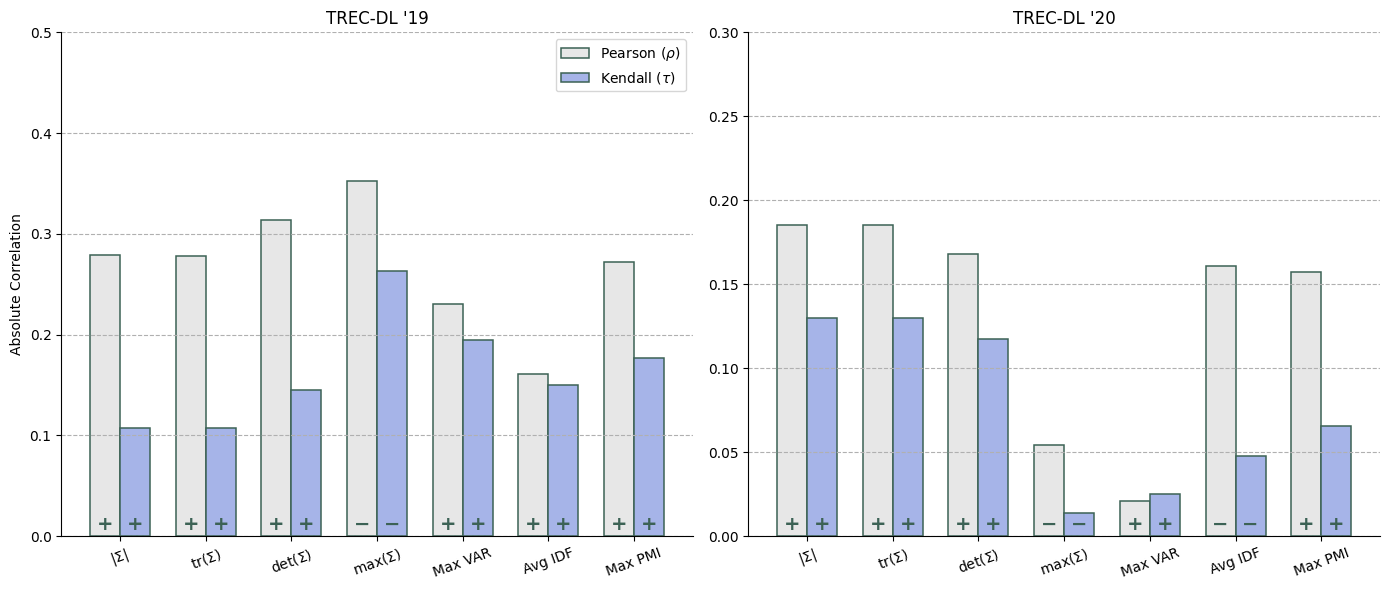

In [56]:
bar_width = 0.35
x = np.arange(len(methods))

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# TREC 2019
bars1 = axes[0].bar(x - bar_width/2, np.abs(pearson_trec_19), width=bar_width, label='Pearson ($\\rho$)', color=colors['pearson'], edgecolor=colors['border'], linewidth=1.1)
bars2 = axes[0].bar(x + bar_width/2, np.abs(kendall_trec_19), width=bar_width, label='Kendall ($\\tau$)', color=colors['kendall'], edgecolor=colors['border'], linewidth=1.1)
axes[0].set_xticks(x)
axes[0].set_xticklabels(methods, rotation=20)
axes[0].set_title("TREC-DL '19")
axes[0].set_ylabel('Absolute Correlation')
axes[0].legend()
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_ylim(0, 0.5)
axes[0].grid(True, axis='y', ls='--')

# Add sign inside bars
for bars, vals in zip([bars1, bars2], [pearson_trec_19, kendall_trec_19]):
    for bar, val in zip(bars, vals):
        sign = "+" if val >= 0 else "−"
        axes[0].text(
            bar.get_x() + bar.get_width() / 2,
            0.012,
            sign,
            ha='center',
            va='center',
            color=colors['border'],
            fontsize=14,
            fontweight='bold'
        )

# TREC 2020
bars1 = axes[1].bar(x - bar_width/2, np.abs(pearson_trec_20), width=bar_width, label='Pearson ($\\rho$)',  color=colors['pearson'], edgecolor=colors['border'], linewidth=1.1)
bars2 = axes[1].bar(x + bar_width/2, np.abs(kendall_trec_20), width=bar_width, label='Kendall ($\\tau$)', color=colors['kendall'], edgecolor=colors['border'], linewidth=1.1)
axes[1].set_xticks(x)
axes[1].set_xticklabels(methods, rotation=20)
axes[1].set_title("TREC-DL '20")
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_ylim(0, 0.3)
axes[1].grid(True, axis='y', ls='--')

for bars, vals in zip([bars1, bars2], [pearson_trec_20, kendall_trec_20]):
    for bar, val in zip(bars, vals):
        sign = "+" if val >= 0 else "−"
        axes[1].text(
            bar.get_x() + bar.get_width() / 2,
            0.007,
            sign,
            ha='center',
            va='center',
            color=colors['border'],
            fontsize=14,
            fontweight='bold'
        )

plt.tight_layout()
plt.show()

In [57]:
fig.savefig('../figures/qpp/qpp-1.png', dpi=400, bbox_inches='tight')